In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
dataset_dir = "LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [6]:
xtrain,ytrain=dataset_generator[0]
xtest,ytest=dataset_generator[1]
print(len(xtrain))
print(len(xtest))

2000
2000


In [7]:
# a.Load in a pre-trained CNN model trained on a large dataset
weight_path="LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model=VGG16(weights=weight_path,include_top=False,input_shape=(64,64,3))

In [8]:
# b. Freeze parameters (weights) in model’s lower convolutional layers
for layer in base_model.layers:
    layer.trainable=False

In [10]:
# c. Add custom classifier with several layers of trainable parameters to model
x=Flatten()(base_model.output)
x=Dense(64,activation="relu")(x)
pred=Dense(102,activation="softmax")(x)

model=Model(inputs=base_model.input,outputs=pred)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [13]:
# d. Train classifier layers on training data available for task
model.fit(xtrain,ytrain,epochs=1,batch_size=64,validation_data=(xtest,ytest))

32/32 [==============================] - 127s 4s/step - loss: 2.2802 - accuracy: 0.5090 - val_loss: 2.4698 - val_accuracy: 0.4640


In [14]:
# e. Fine-tune hyper parameters and unfreeze more layers as needed

for layer in base_model.layers[len(base_model.layers)-2:]:
    layer.trainable=True

x=Flatten()(base_model.output)
x=Dense(512,activation="relu")(x)
x=tf.keras.layers.Dropout(0.3)(x)
pred=Dense(102,activation="softmax")(x)
model=Model(inputs=base_model.input,outputs=pred)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=1,batch_size=64,validation_data=(xtest,ytest))

32/32 [==============================] - 184s 6s/step - loss: 3.1360 - accuracy: 0.3590 - val_loss: 2.3463 - val_accuracy: 0.4760


In [15]:
labels=list(dataset_generator.class_indices.keys())

63/63 [==============================] - 94s 1s/step
Predicted value : BACKGROUND_Google


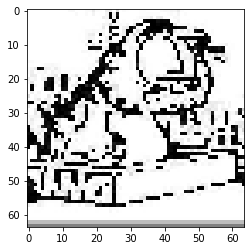

In [16]:
predicted=model.predict(xtest)
plt.imshow(xtest[1000])
print("Predicted value :",labels[np.argmax(predicted[1000])])
